In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from data.aware_raw import AwareRaw, AwareSpectrogram

classes = [
    'Control / healthy / no pulmonary disease',
    'Asthma',
    'CF',
    'COPD'
]

dataset_raw = AwareRaw("data/AWARE_DATA_LABELS_2023-12-08_1611.csv", "data/id_map.csv", "data/aware_full_1704385505.db", pickle_file="data/aware_segmented.pkl")
dataset = AwareSpectrogram(
    dataset_raw, 
    target_classes=classes, 
    age_balanced=False, 
    output_demogr=False, 
    output_spiro_raw=False, 
    output_spiro_pred=False, 
    output_oscil_raw=False, 
    output_oscil_zscore=False, 
    output_disease_label=False,
    output_inhale_exhale=True,
    relative_change=False, 
    calibration=True, 
    averaged=False, 
    num_channels=3,
    dim_order='BTCHW',
    modality='ir'
)
imflip = True

0it [00:00, ?it/s]

(18, 24000)


/tmp/ipykernel_3794632/4226547782.py:52: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.scatterplot(


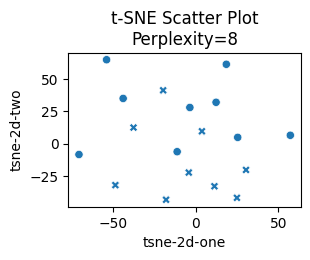

/home/eric/miniconda3/envs/aware/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(18, 24000)


/tmp/ipykernel_3794632/4226547782.py:76: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.scatterplot(


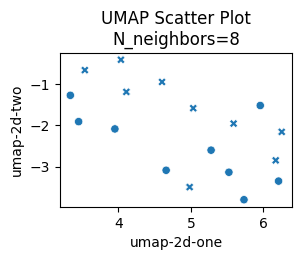

(18, 24000) (18,) (18,)


In [14]:
import torch
from torchview import draw_graph
import math
import matplotlib.pyplot as plt
from matplotlib import animation
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.metrics import pairwise_distances
import seaborn as sns
import pandas as pd

RANDOM_SEED = [4399,114514,1234,1024,304,1,2,3,4,5]
# RANDOM_SEED = [1]
BATCH_SIZE = 1000
LEARN_RATE = 1e-3
MAX_NUM_EPOCH = 10
MODEL_NAME = "cnn"
VISUALIZE_MODEL = False

# data_loader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)
# inputs, labels = next(iter(data_loader))
# print('Input Size:', inputs.size())

LABEL_TO_NUM = {
    'Control / healthy / no pulmonary disease': 0,
    'Asthma': 1,
    'CF': 2,
    'COPD': 3,
    'Others': 4
}

X = dataset.data['IR']
X = np.array(X.to_list())
X = X.reshape(X.shape[0],-1)
y = dataset.data['isExhale'].to_numpy()
group = dataset.data['AWARE STUDY ID:'].to_numpy()

idx = (group==300)
X,y,group = X[idx,:],y[idx],group[idx]

def tsne_plot(X, y, legend, group=None, perplexity=30):
    print(X.shape)
    tsne = TSNE(n_components=2, verbose=0, perplexity=perplexity, max_iter=300, random_state=RANDOM_SEED[0])
    tsne_results = tsne.fit_transform(X)
    
    results = {'tsne-2d-one': tsne_results[:,0],
               'tsne-2d-two': tsne_results[:,1],
               'isExhale': y,
               'id': group}
    
    fig, ax = plt.subplots(figsize=(3,2))
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue="id",
        style="isExhale",
        data=results,
        palette=sns.color_palette(),
        legend=False,
    )
#     plt.xlim([-15,15])
#     plt.ylim([-15,15])
    plt.title(f"t-SNE Scatter Plot\nPerplexity={perplexity}")
    plt.show()

def umap_plot(X, y, legend, group=None, n_neighbors=15):
    print(X.shape)
    umap = UMAP(n_components=2, n_neighbors=n_neighbors, min_dist=0.1, random_state=RANDOM_SEED[0])
    umap_results = umap.fit_transform(X)
    
    results = {'umap-2d-one': umap_results[:,0],
               'umap-2d-two': umap_results[:,1],
               'isExhale': y,
               'id': group}
    
    fig, ax = plt.subplots(figsize=(3,2))
    sns.scatterplot(
        x="umap-2d-one", y="umap-2d-two",
        hue="id",
        style="isExhale",
        data=results,
        palette=sns.color_palette(),
        legend=False,
    )
#     plt.xlim([-15,15])
#     plt.ylim([-15,15])
    plt.title(f"UMAP Scatter Plot\nN_neighbors={n_neighbors}")
    plt.show()

# tsne_plot(inputs.view(inputs.size(0),-1).numpy(), labels.numpy(), ['In','Ex'])
tsne_plot(X,y,['In','Ex'],group,perplexity=8)
# umap_plot(inputs.view(inputs.size(0),-1).numpy(), labels.numpy(), ['In','Ex'])
umap_plot(X,y,['In','Ex'],group,n_neighbors=8)

print(X.shape, group.shape, y.shape)
# df = pd.DataFrame(X)
# display(df)
# df.to_csv("feature_raw.csv", header=False, index=False)

# df = pd.DataFrame(group)
# display(df)
# df.to_csv("id.csv", header=False, index=False)

# df = pd.DataFrame(y.astype(int))
# display(df)
# df.to_csv("label.csv", header=False, index=False)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
from sklearn.manifold import TSNE
import sklearn.metrics as M
import seaborn as sns
from data.aware_raw import KFoldSplitter
from tqdm.notebook import tqdm

RANDOM_SEED = 4399
BATCH_SIZE = 2000

splitter = KFoldSplitter(dataset, BATCH_SIZE, random_seed=RANDOM_SEED)

df = pd.DataFrame()
output = {
#     "KNN": pd.DataFrame(),
    "Linear SVM": pd.DataFrame(),
#     "RBF SVM": pd.DataFrame(),
    "Logi Regr (L2, default)": pd.DataFrame(),
    "Logi Regr (L1)": pd.DataFrame(),
#     "Decision Tree": pd.DataFrame(),
#     "Random Forest": pd.DataFrame(),
    "MLP": pd.DataFrame(),
#     "AdaBoost": pd.DataFrame(),
    "Naive Bayes": pd.DataFrame()
}
# cols = [
#     'Age', 'Sex', 'Height', 'Weight',
#     'FEV1', 'FVC', 'FEV1/FVC', 'FEF2575',
#     'Diagnosis', 'Prediction'
# ]

names = [
#     "KNN",
    "Linear SVM",
#     "RBF SVM",
    "Logi Regr (L2, default)",
    "Logi Regr (L1)",
#     "Decision Tree",
#     "Random Forest",
    "MLP",
#     "AdaBoost",
    "Naive Bayes"
]

classifiers = [
#     KNeighborsClassifier(5),
    SVC(kernel="linear", C=0.025, random_state=42),
#     SVC(gamma=2, C=1, random_state=42),
    LogisticRegression(max_iter=200),
    LogisticRegression(penalty='l1', solver='liblinear', max_iter=200),
#     DecisionTreeClassifier(max_depth=5, random_state=42),
#     RandomForestClassifier(
#         max_depth=5, n_estimators=10, max_features=1, random_state=42
#     ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
#     AdaBoostClassifier(algorithm="SAMME", random_state=42),
    GaussianNB()
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for split_idx, (train_loader, test_loader) in enumerate(splitter):
    for batch_idx, (inputs, labels) in enumerate(train_loader):
        # X_train = np.concatenate((demogr, spiro), axis=1)
        X_train = inputs.view(inputs.size(0),-1)
        y_train = labels
    for batch_idx, (inputs, labels) in enumerate(test_loader):
        # X_test = np.concatenate((demogr, spiro), axis=1)
        X_test = inputs.view(inputs.size(0),-1)
        y_test = labels
    
    s = {}
    for name, clf in tqdm(zip(names, classifiers)):
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        bal_acc = M.balanced_accuracy_score(y_test, y_pred)
        s[name] = bal_acc

    s = pd.Series(s)
    df = pd.concat([df, s.to_frame().T])
df = df.reset_index(drop=True)
df_avg = df.mean(axis=0).to_frame().T
df_avg.index = ['Avg']
display(pd.concat((df, df_avg)))